# 住宅価格の予測

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from scipy import stats

In [10]:
# データセットの準備
df_origin = pd.read_csv("train.csv")
df_origin.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [219]:
df = df_origin[["GrLivArea", "YearBuilt", "SalePrice"]]
X = df[["GrLivArea", "YearBuilt"]]
y = df[["SalePrice"]]

display(X.head())
display(X.tail())
display(y.head())
display(y.tail())

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000


,GrLivArea,YearBuilt
1455,1647,1999
1456,2073,1978
1457,2340,1941
1458,1078,1950
1459,1256,1965


,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


,SalePrice
1455,175000
1456,210000
1457,266500
1458,142125
1459,147500


# 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation

評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。

sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation

可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

In [220]:
# 欠損値の有無確認
df.isnull().sum()

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

In [221]:
# データ型の確認
df.dtypes

GrLivArea    int64
YearBuilt    int64
SalePrice    int64
dtype: object

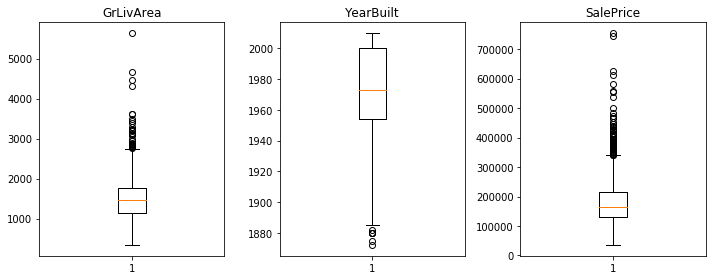

In [222]:
# 分布の確認
fig, ax = plt.subplots(1,3, figsize=(10,4))
ax[0].boxplot([df['GrLivArea']])
ax[0].set_title('GrLivArea')
ax[1].boxplot([df["YearBuilt"]])
ax[1].set_title('YearBuilt')
ax[2].boxplot([df["SalePrice"]])
ax[2].set_title('SalePrice')
plt.tight_layout();

In [223]:
# 分割
from sklearn.model_selection import train_test_split
# ndarray変換
X_array = X.values
# yに関して一次元化（グラフ化で必要）
# y_array = np.ravel(y.values)
# この段階で一次元化すると標準化できない
y_array = y.values

X_train, X_valid, y_train, y_valid = train_test_split(
    X_array, y_array, test_size=0.25, random_state=0)

y_train

array([[107500],
       [160000],
       [145000],
       ...,
       [112000],
       [234000],
       [221000]])

In [285]:
# 各特徴量の標準化
from sklearn.preprocessing import StandardScaler
# X、yを分けてインスタンス化
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_std = scaler_X.fit_transform(X_train)
X_valid_std = scaler_X.transform(X_valid)
y_train_std = scaler_y.fit_transform(y_train)
y_valid_std = scaler_y.transform(y_valid)
# yの一次元化(グラフ化の際に必要？)
#y_train_std = np.ravel(y_train_std)
#y_valid_std =np.ravel(y_valid_std)

In [286]:
# 平均の確認
print(np.mean(X_train_std, axis=0))

# 分散の確認
print(np.var(X_train_std, axis=0))

[-2.64628502e-17  3.09807988e-15]
[1. 1.]


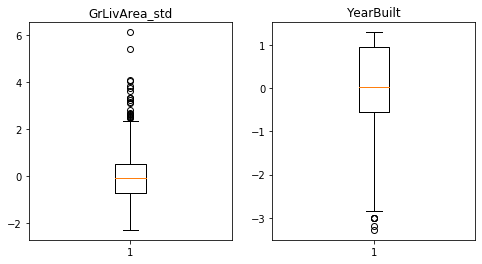

In [287]:
# 標準化後の分布の確認
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].boxplot(X_train_std[:, 0])
ax[0].set_title('GrLivArea_std')
ax[1].boxplot(X_train_std[:, 1])
ax[1].set_title('YearBuilt');

In [288]:
# 線形回帰
# ２つの特徴量を用いて同時に学習
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_std, y_train_std)
# 線形回帰での推定
y_train_predict = linreg.predict(X_train_std)

In [289]:
# 線形回帰　平均二乗誤差による評価
from sklearn.metrics import mean_squared_error

# trainの結果
mse_train = mean_squared_error(y_train_std, y_train_predict)
print('trainのMSE：', mse_train)
# validの結果
y_valid_predict = linreg.predict(X_valid_std)
mse_valid = mean_squared_error(y_valid_std, y_valid_predict)
print('validのMSE：', mse_valid)

trainのMSE： 0.3230340002216025
validのMSE： 0.43907684889449866


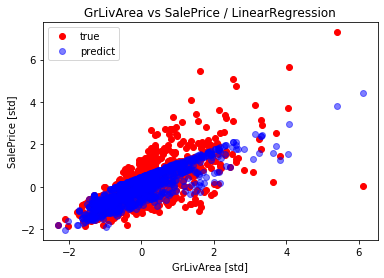

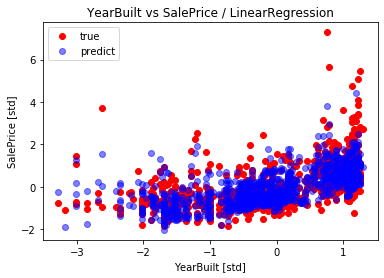

In [290]:
# グラフ化の関数
# 可視化は横軸にある特徴量、縦軸に推測した住宅価格
def graph(X, y, predict, model):
    for i in range(2):
        fig = plt.figure()
        plt.plot(X[:, i], y, 'r.', markersize=12)
        plt.plot(X[:, i], predict, 'b.', markersize=12, alpha=0.5)
        plt.legend(["true", "predict"])
        plt.ylabel(df.columns[2] + ' [std]')
        plt.xlabel(df.columns[i] + ' [std]')
        plt.title(df.columns[i] + ' vs ' + df.columns[2] + ' / '+ model);

graph(X_train_std, y_train_std, y_train_predict, 'LinearRegression')

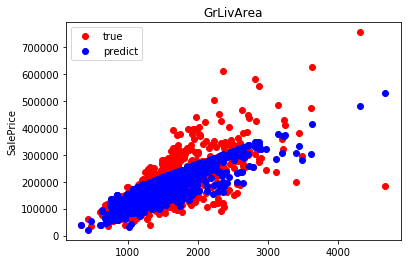

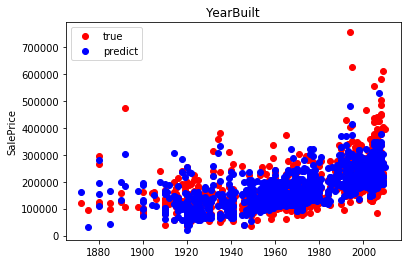

In [291]:
# target(SalePrice)を標準化する前への逆変換
y_train_predict_inv = scaler_y.inverse_transform(y_train_predict)

fig = plt.figure()
plt.plot(X_train[:, 0], y_train, 'r.', markersize=12)
plt.plot(X_train[:, 0], y_train_predict_inv, 'b.', markersize=12)
plt.legend(["true", "predict"])
plt.ylabel(y.columns[0])
plt.title(X.columns[0])

fig = plt.figure()
plt.plot(X_train[:, 1], y_train, 'r.', markersize=12)
plt.plot(X_train[:, 1], y_train_predict_inv, 'b.', markersize=12)
plt.legend(["true", "predict"])
plt.ylabel(y.columns[0])
plt.title(X.columns[1]);

# 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

* 線形回帰
* SVM
* 決定木
* ランダムフォレスト

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


trainのMSE： 0.2773499986706624
validのMSE： 0.43907684889449866


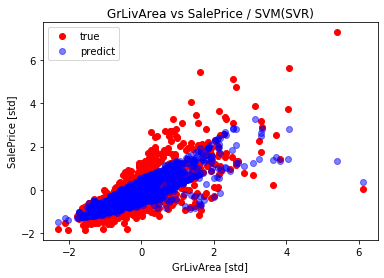

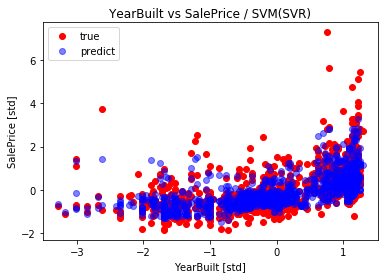

In [292]:
# SVM（SVR）
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_std, y_train_std)
# SVM（SVR）での推定
y_train_predict_svr = svr.predict(X_train_std)

# SVM（SVR）　平均二乗誤差による評価
# trainの結果
mse_train_svr = mean_squared_error(y_train_std, y_train_predict_svr)
print('trainのMSE：', mse_train_svr)
# validの結果
y_valid_predict_svr = linreg.predict(X_valid_std)
mse_valid_svr = mean_squared_error(y_valid_std, y_valid_predict_svr)
print('validのMSE：', mse_valid_svr)

# 可視化
graph(X_train_std, y_train_std, y_train_predict_svr, 'SVM(SVR)')

In [1]:
# 決定木
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train_std, y_train_std)
# DecisionTreeRegressorでの推定
y_train_predict_dtree = dtree.predict(X_train_std)

# DecisionTreeRegressor　Rによる評価
# trainの結果
mse_train_dtree = mean_squared_error(y_train_std, y_train_predict_dtree)
print('trainのMSE：', mse_train_dtree)
# validの結果
y_valid_predict_dtree = dtree.predict(X_valid_std)
mse_valid_dtree = mean_squared_error(y_valid_std, y_valid_predict_dtree)
print('validのMSE：', mse_valid_dtree)

# 可視化
graph(X_train_std, y_train_std, y_train_predict_dtree, 'DecisionTreeRegressor')

NameError: name 'X_train_std' is not defined

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


trainのMSE： 0.055856751290114165
validのMSE： 0.35791146096131876


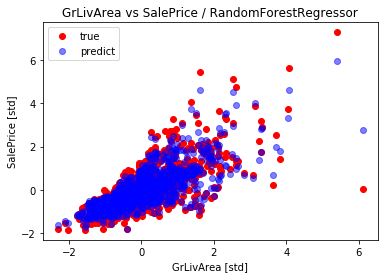

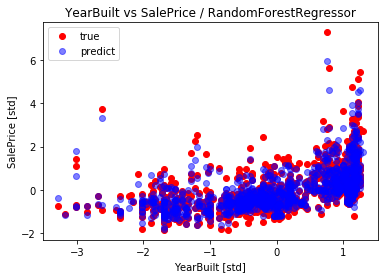

In [294]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor()
rfreg.fit(X_train_std, y_train_std)
# RandomForestRegressorでの推定
y_train_predict_rfreg = rfreg.predict(X_train_std)

# RandomForestRegressor　平均二乗誤差による評価
# trainの結果
mse_train_rfreg = mean_squared_error(y_train_std, y_train_predict_rfreg)
print('trainのMSE：', mse_train_rfreg)
# validの結果
y_valid_predict_rfreg = rfreg.predict(X_valid_std)
mse_valid_rfreg = mean_squared_error(y_valid_std, y_valid_predict_rfreg)
print('validのMSE：', mse_valid_rfreg)

# 可視化
graph(X_train_std, y_train_std, y_train_predict_rfreg, 'RandomForestRegressor')

In [295]:
mse_train_list = [mse_train, mse_train_svr, mse_train_dtree, mse_train_rfreg]

mse_valid_list = [mse_valid, mse_valid_svr, mse_valid_dtree, mse_valid_rfreg]

df_mes =pd.DataFrame([mse_train_list, mse_valid_list],
                       index=['mse_train', 'mse_valid'],
                       columns=['線形回帰', 'SVM', '決定木', 'ランダムフォレスト'])
df_mes

,線形回帰,SVM,決定木,ランダムフォレスト
mse_train,0.323034,0.277350,0.003100,0.055857
mse_valid,0.439077,0.439077,0.476971,0.357911


# 考察

* trainの指標（mse）は決定木、ランダムフォレストが低かった、  
グラフからもよくフィットしていることが分かる
* しかし決定木、ランダムフォレスはvalidでの指標が高くなる（過学習）
* 線形回帰、SVMでは指標が０.3程度とやや高め（表現しきれていない）